In [1]:
import cv2
import numpy as np
import os
from PIL import Image
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [167]:
#FOR CLOSING THE CAM
cam.release()

NameError: name 'cam' is not defined

## DATASET CREATOR

In [394]:
def insertOrUpdate(Name):
    conn = sqlite3.connect("Faces1.0.db")
    with conn:
        cur=conn.cursor()
        cur.execute("INSERT INTO People(Name) VALUES ('"+ Name +"');")
        max_id = cur.lastrowid
        Id= max_id
    cmd = "SELECT * FROM People WHERE ID="+str(Id)
    cursor = conn.execute(cmd)
    isRecordExist=0
    for row in cursor:
        isRecordExist=1
    if(isRecordExist==1):
        cmd = "UPDATE people SET Name=' " + str(sname) + " ' WHERE ID=" + str(Id)
    else:
        cmd = "INSERT INTO people(ID,Name) Values(" + str(Id) + ",' " + str(sname) + " ' )"
    conn.execute(cmd)
    conn.commit()
    conn.close()
    return max_id

In [405]:
cam = cv2.VideoCapture(0)
detector=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
sname="Merisha"
Id=insertOrUpdate(sname)
name =  "_".join(sname.lower().split(" "))
sampleNum=0

In [406]:
while(True):
    ret, img = cam.read()
    gray=img
    cv2.imshow('frame', img)
    faces=detector.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5, minSize=(100, 100), flags=cv2.CASCADE_SCALE_IMAGE)
    for(x,y,w,h) in faces:
        sampleNum= sampleNum + 1
        # 200 x 200 image
        cv2.imwrite("Database/" + name + "." + str(Id) + "."+ str(sampleNum)+".jpg", gray[y:y + 200, x:x + 200])
        cv2.rectangle(img, (x - 50, y - 50), (x + w + 50, y + h + 50), (0, 225, 0), 2)
    cv2.imshow('frame', img)
    #wait for 100 miliseconds 
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break
    # break if the sample number is more than 10
    elif sampleNum>10:
        break
cam.release()
cv2.destroyAllWindows()

##  TRAINER 

In [407]:
# Trainer
# # Create Local Binary Patterns Histograms for face recognization
recognizer = cv2.face.LBPHFaceRecognizer_create()
detector= cv2.CascadeClassifier("haarcascade_frontalface_default.xml");

path = "Database"
# Using prebuilt frontal face training model, for face detection
# detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml");

# Create method to get the images and label data
def getImagesAndLabels(path):
    # Get all file path
    imagePaths = [os.path.join(path, f) for f in os.listdir(path)]

    # Initialize empty face sample
    faceSamples = []

    # Initialize empty id
    ids = []

    # Loop all the file path
    for imagePath in imagePaths:

        # Get the image and convert it to grayscale
#         PIL_img = Image.open(imagePath).convert('L')
        
        PIL_img = Image.open(imagePath)

        # PIL image to numpy array
        img_numpy = np.array(PIL_img, dtype='uint8')
        img_numpy = img_numpy.tolist()

        # Get the image id
        id = int(os.path.split(imagePath)[-1].split(".")[1])

        # Get the face from the training images
#        faces = detector.detectMultiScale(img_numpy)

#         # Loop for each face, append to their respective ID
#         for (x, y, w, h) in faces:
#             # Add the image to face samples
#             faceSamples.append(img_numpy[y:y + h, x:x + w])

        # NO need to crop so directly appended
        faceSamples.append(img_numpy)
        # Add the ID to IDs
        ids.append(id)

    # Pass the face array and IDs array
    return faceSamples, ids


# Get the faces and IDs
faces, ids = getImagesAndLabels(path)

# Train the model using the faces and IDs
# recognizer.train(faces, np.array(ids))

# Save the model into trainer.yml
# with open('trainer.yml', "a") as recognizer:
# recognizer.write('trainer/trainer.yml')

# cv2.imshow('img', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [408]:
# For one hot encoding .reshape(1,len(ids)) - if needed
labels = np.array(ids)
print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0 10 10 10 10 10 10 10 10 10 10 10  2  2  2
  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4
  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  9
  9  9  9  9  9  9  9  9  9  9]


In [409]:
np.hstack(labels)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9])

In [410]:
# a = np.random.rand(5,5,4,3)
# (np.reshape(a, (5,5,12)))
np.array(faces).shape

(110, 200, 200, 3)

In [411]:
no_of_faces= len(faces)

In [412]:
horizontal_faces = np.reshape(np.array(faces),(no_of_faces,120000))


In [413]:
horizontal_faces.shape

(110, 120000)

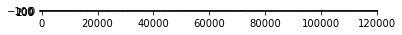

In [414]:
plt.imshow(horizontal_faces)

In [415]:
#### VSTACK COMMAND

In [416]:
## USE THIS
# 22*120000
print(np.vstack(face for face in horizontal_faces))

[[220 205 198 ...,  27  33  49]
 [202 200 188 ...,  38  37  55]
 [211 196 193 ...,  32  35  50]
 ..., 
 [147 130 123 ..., 209 199 198]
 [160 141 135 ..., 213 228 255]
 [ 11   9  10 ..., 102  78 104]]


In [417]:
# faceData=[]
# pixelData = []

# for face in faces:
#     for pixels in face:
#         for pixel in pixels:
# #             for a in pixel:
#             faceData.append(pixel)

In [418]:
# np.vstack( face for face in faces)

In [419]:
training_images = np.vstack( face for face in horizontal_faces)
len(training_images[0])
train_len = len(training_images)
# training_images.reshape(train_len,3,200,200)
print(train_len)
print(len(training_images[0]))

110
120000


In [420]:
val = len(set(ids))
vec= labels
n=len(vec)
out = np.zeros((n, val))
out[range(n), vec] = 1
out

IndexError: index 10 is out of bounds for axis 1 with size 10

In [ ]:
no_of_encodings = len(set(ids))

In [ ]:
n = len(labels)
out = np.zeros((n, no_of_encodings))
# out[range(n), labels]=1
out

# Creating CNN

In [ ]:
no_of_encodings = len(ids)

In [ ]:
def one_hot_encode(vec, vals=no_of_encodings):
    '''
    For use to one-hot encode the 10- possible labels
    '''
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [475]:
class CifarHelper():
    
    def __init__(self):
        self.i = 0
        
        self.all_train_batches = faces[:19]
        self.test_batch = faces[:-3]
        
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
        
        self.training_images = np.vstack(face for face in horizontal_faces)
        train_len = len(self.training_images)
        print(self.training_images[0])
        
        self.training_images = self.training_images.reshape(train_len,3,200,200).transpose(0,2,3,1)/255
        self.training_labels = one_hot_encode(labels,no_of_encodings)
        print(self.training_labels.shape)
#         print("Setting Up Test Images and Labels")
        
#         self.test_images = np.vstack([d[b"data"] for d in self.test_batch])
#         test_len = len(self.test_images)
        
#         self.test_images = self.test_images.reshape(test_len,3,32,32).transpose(0,2,3,1)/255
#         self.test_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.test_batch]), 10)

        
    def next_batch(self, batch_size):
        x = self.training_images[self.i:self.i+batch_size].reshape(1,200,200,3)
        y = self.training_labels[self.i:self.i+batch_size]
        self.i = (self.i + batch_size) % len(self.training_images)
        return x, y

In [476]:
# Before Your tf.Session run these two lines
ch = CifarHelper()
ch.set_up_images()

# During your session to grab the next batch use this line
# (Just like we did for mnist.train.next_batch)
# batch = ch.next_batch(100)

Setting Up Training Images and Labels
[220 205 198 ...,  27  33  49]
(110, 11)


## Trainer - CNN

In [477]:
import tensorflow as tf

In [478]:
#HELPER FUNCTIONS

def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

In [479]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

In [480]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [481]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

In [482]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

In [483]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [484]:
x = tf.placeholder(tf.float32,shape=[None,200,200,3])
y_true = tf.placeholder(tf.float32,shape=[None,no_of_encodings])

In [501]:
# x_image = tf.reshape(x,[-1,200,200,1])
# convo_1 = convolutional_layer(x_image,shape=[4,4,3,200])

In [502]:
convo_1 = convolutional_layer(x_image,shape=[5,5,3,32])
convo_1_pooling = max_pool_2by2(convo_1)

ValueError: Dimensions must be equal, but are 1 and 3 for 'Conv2D_29' (op: 'Conv2D') with input shapes: [?,32,32,1], [5,5,3,32].

In [487]:
convo_2 = convolutional_layer(convo_1_pooling,shape=[5,5,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

In [488]:
convo_2_flat = tf.reshape(convo_2_pooling,[-1,2*2*400])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))

In [489]:
# NOTE THE PLACEHOLDER HERE!
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

In [490]:
y_pred = normal_full_layer(full_one_dropout,no_of_encodings)

In [491]:
y_true.shape

TensorShape([Dimension(None), Dimension(11)])

In [492]:
y_pred.shape

TensorShape([Dimension(None), Dimension(11)])

In [493]:
# LOSS FUNCTION
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

In [494]:
# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)

In [495]:
init = tf.global_variables_initializer()

## Session

In [496]:
# Before Your tf.Session run these two lines
ch = CifarHelper()
ch.set_up_images()

# During your session to grab the next batch use this line
# (Just like we did for mnist.train.next_batch)
# batch = ch.next_batch(100)

Setting Up Training Images and Labels
[220 205 198 ...,  27  33  49]
(110, 11)


In [497]:
saver = tf.train.Saver() 

In [498]:
steps = 1

with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(steps):
        print(steps)
        batch = ch.next_batch(1)
        sess.run(train,feed_dict={x:batch[0],y_true:batch[1],hold_prob:0.5})
        
    # Saving Model for later
    saver.save(sess, "CNN_Models/model1")

1


InvalidArgumentError: logits and labels must be same size: logits_size=[100,11] labels_size=[1,11]
	 [[Node: SoftmaxCrossEntropyWithLogits_14 = SoftmaxCrossEntropyWithLogits[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"](Reshape_56, Reshape_57)]]

Caused by op 'SoftmaxCrossEntropyWithLogits_14', defined at:
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-493-f55b44d0f387>", line 2, in <module>
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1597, in softmax_cross_entropy_with_logits
    precise_logits, labels, name=name)
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 2385, in _softmax_cross_entropy_with_logits
    features=features, labels=labels, name=name)
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\tensorflow\python\framework\ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\maste\Anaconda2\envs\tfdeeplearning\lib\site-packages\tensorflow\python\framework\ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): logits and labels must be same size: logits_size=[100,11] labels_size=[1,11]
	 [[Node: SoftmaxCrossEntropyWithLogits_14 = SoftmaxCrossEntropyWithLogits[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"](Reshape_56, Reshape_57)]]


## RECOGNIZER

In [ ]:
def getProfile(Id):
    conn=sqlite3.connect("Faces1.0.db")
    cmd="SELECT * FROM People WHERE ID="+str(Id)
    cursor=conn.execute(cmd)
    profile=None
    for row in cursor:
        profile=row
    conn.close()
    return profile

In [ ]:
fontFace = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
fontColor = (255, 0, 0)
# for record not found case
fontColor1 = (0, 0, 255)

recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer/trainer.yml')
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml");\
font= cv2.FONT_HERSHEY_SIMPLEX
cam = cv2.VideoCapture(0)
while True:
    ret, img = cam.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray, 1.2,5)
    for(x,y,w,h) in faces:

        Idu, conf = recognizer.predict(gray[y:y+h, x:x+w])
        cv2.putText(img,format(conf, '.2f'), (x, y + h + 120 ), fontFace, fontScale, fontColor1)
        if (conf<80):
            cv2.rectangle(img, (x, y), (x + w, y + h), (225, 0, 0), 2)
            profile = getProfile(Idu)
            if(profile!=None):
                cv2.putText(img, str(profile[1]), (x,y+h+30),fontFace, fontScale, fontColor)
                cv2.putText(img, str(profile[2]), (x, y + h + 60), fontFace, fontScale, fontColor)
                cv2.putText(img, str(profile[3]), (x, y + h + 90), fontFace, fontScale, fontColor)
                #cv2.putText(img, str(profile[4]), (x, y + h + 120), fontFace, fontScale, fontColor)
        else:
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 225), 2)
            font = cv2.FONT_HERSHEY_SIMPLEX
            # cv2.putText(img,"Not Found", (x, y + h + 30 ), fontFace, fontScale, fontColor1)
    cv2.imshow('frame', img)
    if ord('q') == cv2.waitKey(1):
        break
cv2.destroyAllWindows()
cam.release()

In [9]:
cam.release()